# Cover type classification portfolio project

*This is a final portfolio project for Codecademy's Build Deep Learning Models with TensorFlow Skill Path.*
   
   ### Objective: Build a deep learning model to predict the forest cover type from different cartographic variables.
   ### Given:
       1. Cover Types: ['Spruce/Fir', 'Lodgepole Pine','Ponderosa Pine', 'Cottonwood/Willow','Aspen', 'Douglas-fir', 'Krummholz']
       2. A csv file ('cover_data.csv') - 581012 observations. Each observation has 55 columns (54 features and the last one being the class).
   ### Assumption(s):
       1. There are no separate test dataset. Thus, it should be a small percentage of given input as test data.
       2. There is no information about the use of predictions. Therefore, it is unclear whether we should prioritize precision or recall. In general, it is advisable to aim for high scores in both aspects.
   ### Expected output:
       1. A good model.
       2. Model performance over epochs (accuracy, loss plots)
       3. Some classification metrics (heatmap of confusion-matrix, classification-report etc).
       4. Conclusions, thoughts and ways to improve classification accuracy.

## Data overview

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Codecademy deep learning/Forest Cover Classification

/content/drive/MyDrive/Colab Notebooks/Codecademy deep learning/Forest Cover Classification


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
# Disable those annoying warnings
tf.get_logger().setLevel('ERROR')

# Turn off GPU usage for tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

In [8]:
data = pd.read_csv("cover_data.csv")

In [10]:
print(data.describe())

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

In [12]:
print(len(data))

581012


In [13]:
labels = data.columns
print("Labels:", labels)

Labels: Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soi

## Create deep learining classification functions

In [17]:
def prep_data(raw_df):
    """
    Prepare data that can be readily consumed by ML/DL algorithms.
    - separate features from class variables
    - split into training and testing dataset
    - scale numerical data

    param: a dataframe of input data
    output: X_train_normalized, X_test_normalized, y_train, y_test
    """
    raw_data = raw_df.values
    X, y = raw_data[:, :-1], raw_data[:, -1]

    # Split into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

    # normalize data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    return X_train_normalized, X_test_normalized, y_train, y_test

In [18]:
def build_model(num_features):
    """
    Build the model architecture (and compile it).
    input: number of features
    output: Keras model object.
    """
    classifier = keras.Sequential()
    classifier.add(layers.Dense(64, input_dim=num_features, activation='relu'))
    #classifier.add(layers.Dropout(0.3))
    classifier.add(layers.Dense(32, activation='relu'))
    #classifier.add(layers.Dropout(0.3))
    classifier.add(layers.Dense(8, activation='softmax'))
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return classifier

In [29]:
def plot_heatmap(class_names, y_pred, y_test):
    """
    Function to compute a Confusion Matrix and plot a heatmap based on the matrix.
    input: class names, y-predicted, y-test (ground-truth)
    output: a PNG file of the heatmap.
    """
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(15, 15))
    heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
    ax.set_xlabel('Predicted class')
    ax.set_ylabel('True class')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)
    # Save the heatmap to file
    heatmapfig = heatmap.get_figure()
    #heatmapfig.savefig(f'../output/confusion_matrix.png')

In [20]:
def plot_history(history, param):
    """
    Shows how the model performs (in terms of accuracy and loss) over several epochs.
    """
    if param == 'acc':
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    elif param == 'loss':
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.show()

##Run a model

###The central role of the function below is to oversee the entire code operation. It starts by organizing the dataset, then proceeds to construct a model with suitable parameters. Following that, it assesses the model's performance and makes predictions on the test data. Ultimately, it generates visual representations of various performance metrics.

In [23]:
def main():
    infile = '/content/drive/MyDrive/Colab Notebooks/Codecademy deep learning/Forest Cover Classification/cover_data.csv'
    raw_df = pd.read_csv(infile)

    # EDA
    # Uncomment the below two lines to run EDA. Takes > 10 min to run.
    #my_report = sv.analyze(raw_df)
    #my_report.show_html()

    cols = raw_df.columns.tolist()
    features, label = cols[:-1], cols[-1]
    X_train, X_test, y_train, y_test = prep_data(raw_df)

    # Build a DL model
    num_features = len(features)
    model = build_model(num_features)

    print("Summary report of Keras classifier:")
    model.summary()

    num_epochs = 100
    batch_size = 1024
    earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3)
    history = model.fit(X_train,
                        y_train,
                        epochs=num_epochs,
                        batch_size=batch_size,
                        callbacks=[earlystop_callback],
                        validation_split=0.1,
                        verbose=1)

    plot_history(history, 'acc')
    plot_history(history, 'loss')

    score = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test loss: {score[0]}')
    print(f'Test accuracy: {score[1]}')

    y_pred = model.predict(X_test)

    # Convert the pred to discrete values
    y_pred = np.argmax(y_pred, axis=1)
    class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']
    print(classification_report(y_test, y_pred, target_names=class_names))
    plot_heatmap(class_names, y_pred, y_test)

Summary report of Keras classifier:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                3520      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 8)                 264       
                                                                 
Total params: 5864 (22.91 KB)
Trainable params: 5864 (22.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
409/409 [==============================] - 2s 4ms/step - loss: 0.7810 - accuracy: 0.6885 - val_loss: 0.6114 - val_accuracy: 0.7445
Epoch 2/100
409/409 [==============================] - 1s 3ms/step - loss: 0.5806 - accuracy: 0.7538 - va

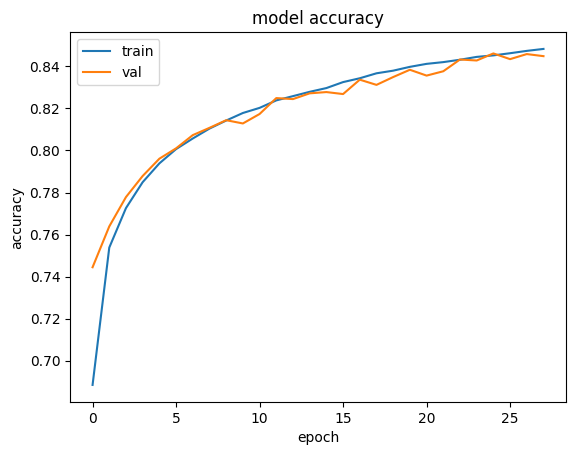

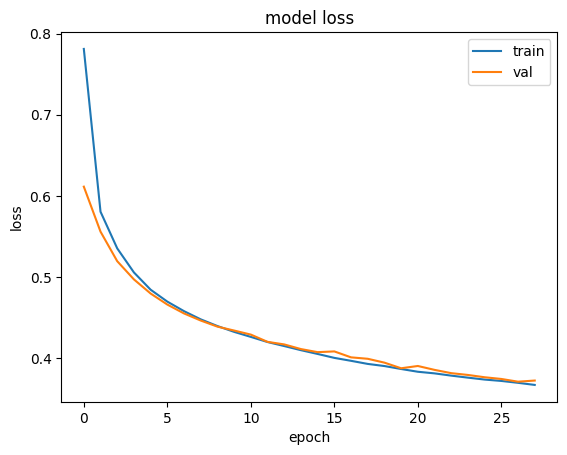

Test loss: 0.37136760354042053
Test accuracy: 0.8469833135604858
3632/3632 [==============================] - 5s 1ms/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.86      0.83      0.84     42368
   Lodgepole Pine       0.85      0.89      0.87     56661
   Ponderosa Pine       0.78      0.88      0.83      7151
Cottonwood/Willow       0.84      0.66      0.74       549
            Aspen       0.75      0.45      0.56      1899
      Douglas-fir       0.74      0.48      0.58      3473
        Krummholz       0.90      0.81      0.85      4102

         accuracy                           0.85    116203
        macro avg       0.82      0.71      0.75    116203
     weighted avg       0.85      0.85      0.84    116203



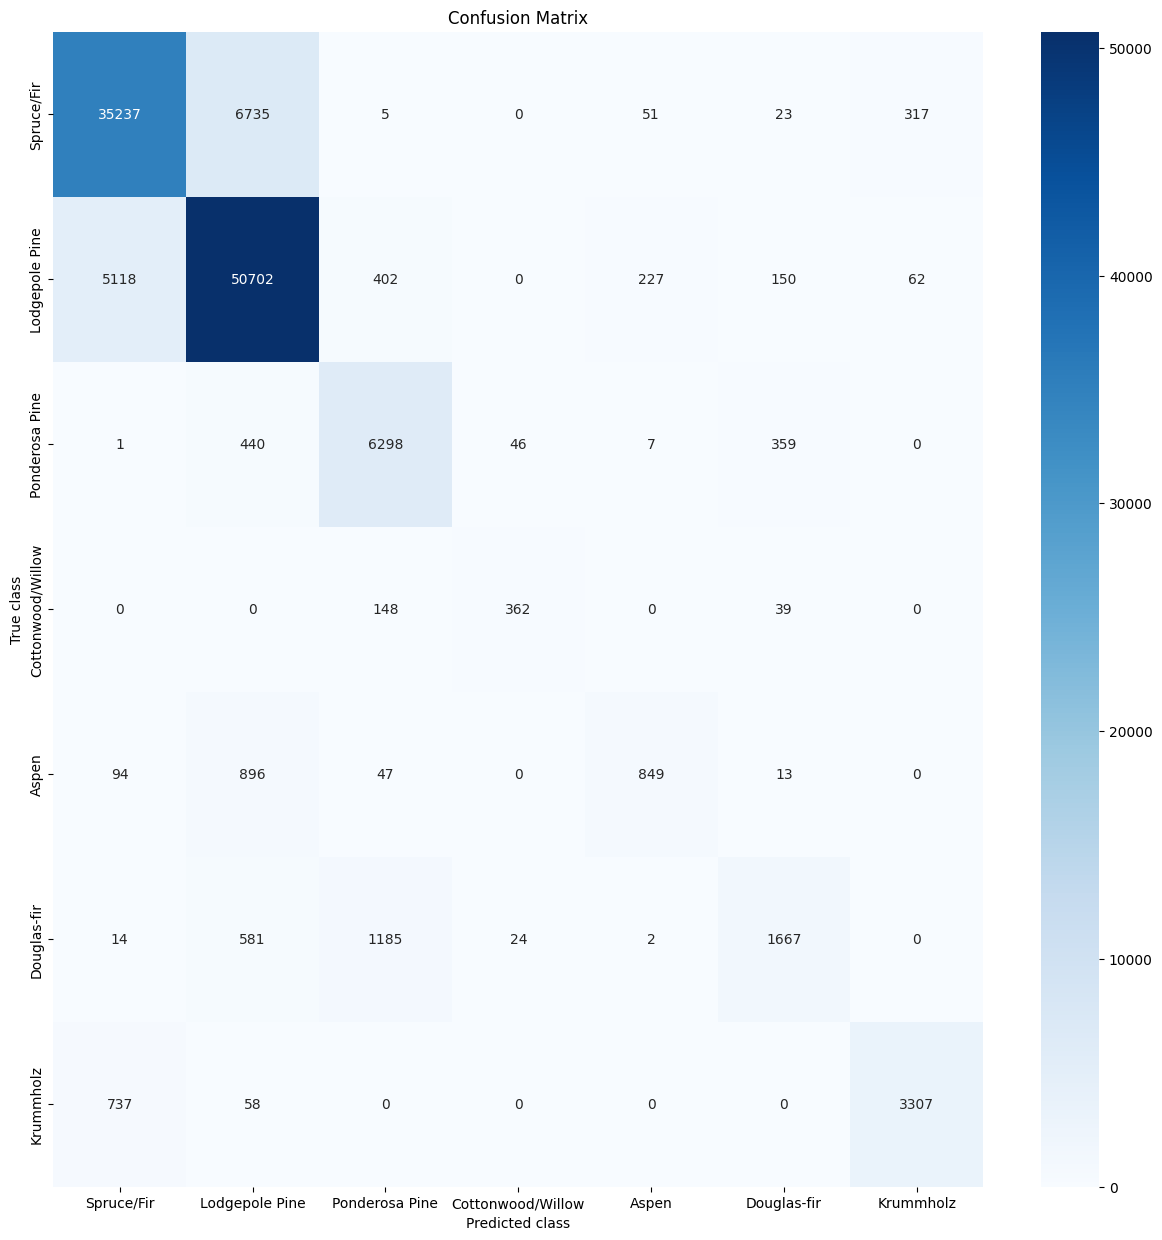

In [30]:
if __name__ == '__main__':
    main()

### Conclusions:
The numbers displayed along the diagonal of the heatmap represent the instances that were correctly classified. Conversely, the numbers located outside the diagonal indicate instances of misclassifications. Notably, Lodgepole Pine, Cottonwood Willow, Aspen, and Douglas-Fir exhibit a notably high rate of misclassifications. To investigate potential causes, the following steps can be taken:

1. Evaluate the distribution of observations for each cover type to address potential imbalances in the dataset, which can impact classification.
2. Examine how each wilderness area is distributed within the dataset.
Identify similarities among different cover types through methods like correlation analysis and scatter plots.
3. These similarities may be contributing to the model's challenges. One approach to address this is by judiciously removing collinear variables, retaining only one.
Scrutinize and rectify noisy, inconsistent, or erroneous data in the training set. It is crucial to involve domain experts in this process.
4. Consider using alternative performance metrics beyond 'accuracy', particularly when dealing with imbalanced data. Metrics such as
5. Precision/Recall, F1-score, etc., provide more reliable evaluations.
6. Experiment with resampling techniques, such as undersampling, oversampling, or stratified sampling, as appropriate. Downsampling could be employed with careful thresholding.

It's important to note that in deep learning, gradients from the majority class(es) tend to dominate and influence weight updates. There are advanced techniques available to mitigate this issue.